# Capa Oro: Datos listos

En este notebook realizamos la construcción de la **Capa Oro**.

**Objetivos:**
- Integrar y depurar los datos de la Capa Plata.
- Generar variables derivadas (ej: amplitud térmica, rangos de presión y humedad).
- Validar la calidad final de los datos.
- Exportar los datasets listos para minería de datos y modelos predictivos.

# Importar las librerías necesarias

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

PLATA_DIR = Path('../data/plata')
ORO_DIR = Path('../data/oro')
ORO_DIR.mkdir(parents=True, exist_ok=True)

# Archivos de entrada
archivo_diario = PLATA_DIR / 'dataset_plata_diario_final.csv'
archivo_horario = PLATA_DIR / 'dataset_plata_horario_final.csv'

print("Importación de librerías completada.")

Importación de librerías completada.


## Carga de Datos
Leemos los archivos generados en la **Capa Plata**.

In [2]:
# Lectura de datasets
df_diario = pd.read_csv(archivo_diario, parse_dates=['FECHA'])
df_horario = pd.read_csv(archivo_horario, parse_dates=['FECHA_HORA'])

print('Datos cargados:')
print(' - Diario:', df_diario.shape)
print(' - Horario:', df_horario.shape)

df_diario.info()
display(df_diario.head())
df_horario.info()
display(df_horario.head())

Datos cargados:
 - Diario: (2130, 22)
 - Horario: (43452, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ESTACION              2130 non-null   object        
 1   FECHA                 2130 non-null   datetime64[ns]
 2   TEMP_MEAN             2130 non-null   float64       
 3   TEMP_MIN              2130 non-null   int64         
 4   TEMP_MAX              2130 non-null   int64         
 5   PNM_MEAN              2130 non-null   float64       
 6   PNM_MIN               2130 non-null   int64         
 7   PNM_MAX               2130 non-null   int64         
 8   HUM_MEAN              2130 non-null   float64       
 9   HUM_MIN               2130 non-null   int64         
 10  HUM_MAX               2130 non-null   int64         
 11  WIND_DIR_MEAN         2130 non-null   float64       
 12  WIND_DIR_MIN  

ESTACION      FECHA  TEMP_MEAN  TEMP_MIN  TEMP_MAX  PNM_MEAN  \
0  CORRIENTES AERO 2024-06-01       19.2        14        26    1014.3   
1  CORRIENTES AERO 2024-06-02       21.0        16        28    1013.1   
2  CORRIENTES AERO 2024-06-03       14.6        10        21    1023.6   
3  CORRIENTES AERO 2024-06-04       12.3         8        16    1019.8   
4  CORRIENTES AERO 2024-06-05       19.5        14        27    1015.9   

   PNM_MIN  PNM_MAX  HUM_MEAN  HUM_MIN  ...  WIND_DIR_MIN  WIND_DIR_MAX  \
0     1013     1016      78.3       54  ...            30           990   
1     1012     1017      76.6       47  ...            20           160   
2     1018     1027      69.3       41  ...           160           210   
3     1017     1022      90.5       79  ...            90           230   
4     1013     1018      83.0       57  ...            10           360   

   WIND_SPEED_MEAN  WIND_SPEED_MIN  WIND_SPEED_MAX  TEMP_MEAN_NORM  \
0             11.8               4              22         0.48182   
1             10.7               4              22         0.53636   
2             22.8               9              35         0.34242   
3              9.5               6              15         0.27273   
4              7.4               4              17         0.49091   

   PNM_MEAN_NORM  HUM_MEAN_NORM  WIND_DIR_MEAN_NORM  WIND_SPEED_MEAN_NORM  
0        0.41124        0.67661             0.23747               0.27551  
1        0.37574        0.64992             0.17949               0.24745  
2        0.68639        0.53532             0.44430               0.55612  
3        0.57396        0.86813             0.36405               0.21684  
4        0.45858        0.75039             0.34937               0.16327  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43452 entries, 0 to 43451
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NOMBRE            43452 non-null  object        
 1   FECHA_HORA        43452 non-null  datetime64[ns]
 2   FECHA             43452 non-null  object        
 3   HORA              43452 non-null  int64         
 4   TEMP              43452 non-null  float64       
 5   HUM               43452 non-null  float64       
 6   PNM               43452 non-null  float64       
 7   DD                43452 non-null  float64       
 8   FF                43452 non-null  float64       
 9   estacion_archivo  43002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 3.3+ MB


NOMBRE          FECHA_HORA       FECHA  HORA  TEMP   HUM     PNM  \
0  CORRIENTES AERO 2024-06-01 00:00:00  2024-06-01     0  15.7  98.0  1014.9   
1  CORRIENTES AERO 2024-06-01 01:00:00  2024-06-01     1  16.1  90.0  1014.8   
2  CORRIENTES AERO 2024-06-01 02:00:00  2024-06-01     2  14.4  96.0  1015.0   
3  CORRIENTES AERO 2024-06-01 03:00:00  2024-06-01     3  15.0  96.0  1014.3   
4  CORRIENTES AERO 2024-06-01 04:00:00  2024-06-01     4  14.9  96.0  1013.9   

      DD   FF  estacion_archivo  
0  100.0  6.0        20240601.0  
1  990.0  4.0        20240601.0  
2  130.0  4.0        20240601.0  
3   90.0  6.0        20240601.0  
4   90.0  6.0        20240601.0

## Generación de Variables Derivadas
Creamos nuevas variables útiles para minería de datos y análisis exploratorio:

In [3]:
# Variables derivadas diarias
df_diario['AMP_TERMICA'] = df_diario['TEMP_MAX'] - df_diario['TEMP_MIN']
df_diario['RANGO_PRESION'] = df_diario['PNM_MAX'] - df_diario['PNM_MIN']
df_diario['RANGO_HUMEDAD'] = df_diario['HUM_MAX'] - df_diario['HUM_MIN']

# Redondeo a 1 decimal para consistencia
cols_derivadas = ['AMP_TERMICA', 'RANGO_PRESION', 'RANGO_HUMEDAD']
df_diario[cols_derivadas] = df_diario[cols_derivadas].round(1)

print('Variables derivadas creadas:')
display(df_diario.head())

Variables derivadas creadas:


ESTACION      FECHA  TEMP_MEAN  TEMP_MIN  TEMP_MAX  PNM_MEAN  \
0  CORRIENTES AERO 2024-06-01       19.2        14        26    1014.3   
1  CORRIENTES AERO 2024-06-02       21.0        16        28    1013.1   
2  CORRIENTES AERO 2024-06-03       14.6        10        21    1023.6   
3  CORRIENTES AERO 2024-06-04       12.3         8        16    1019.8   
4  CORRIENTES AERO 2024-06-05       19.5        14        27    1015.9   

   PNM_MIN  PNM_MAX  HUM_MEAN  HUM_MIN  ...  WIND_SPEED_MIN  WIND_SPEED_MAX  \
0     1013     1016      78.3       54  ...               4              22   
1     1012     1017      76.6       47  ...               4              22   
2     1018     1027      69.3       41  ...               9              35   
3     1017     1022      90.5       79  ...               6              15   
4     1013     1018      83.0       57  ...               4              17   

   TEMP_MEAN_NORM  PNM_MEAN_NORM  HUM_MEAN_NORM  WIND_DIR_MEAN_NORM  \
0         0.48182        0.41124        0.67661             0.23747   
1         0.53636        0.37574        0.64992             0.17949   
2         0.34242        0.68639        0.53532             0.44430   
3         0.27273        0.57396        0.86813             0.36405   
4         0.49091        0.45858        0.75039             0.34937   

   WIND_SPEED_MEAN_NORM  AMP_TERMICA  RANGO_PRESION  RANGO_HUMEDAD  
0               0.27551           12              3             44  
1               0.24745           12              5             47  
2               0.55612           11              9             54  
3               0.21684            8              5             18  
4               0.16327           13              5             42  

[5 rows x 25 columns]

## Validación Final de la Capa Oro
Confirmamos calidad de datos antes de exportar:

In [4]:
print('Valores nulos por columna:')
print(df_diario.isnull().sum())
print('\nResumen estadístico:')
display(df_diario.describe().T)

# Confirmar fechas continuas
fechas_esperadas = pd.date_range(df_diario['FECHA'].min(), df_diario['FECHA'].max(), freq='D')
faltantes = set(fechas_esperadas.date) - set(df_diario['FECHA'].dt.date.unique())
print(f'Fechas faltantes en diario: {len(faltantes)}')
print(f'Detalle de fechas: {faltantes}')

Valores nulos por columna:
ESTACION                0
FECHA                   0
TEMP_MEAN               0
TEMP_MIN                0
TEMP_MAX                0
PNM_MEAN                0
PNM_MIN                 0
PNM_MAX                 0
HUM_MEAN                0
HUM_MIN                 0
HUM_MAX                 0
WIND_DIR_MEAN           0
WIND_DIR_MIN            0
WIND_DIR_MAX            0
WIND_SPEED_MEAN         0
WIND_SPEED_MIN          0
WIND_SPEED_MAX          0
TEMP_MEAN_NORM          0
PNM_MEAN_NORM           0
HUM_MEAN_NORM           0
WIND_DIR_MEAN_NORM      0
WIND_SPEED_MEAN_NORM    0
AMP_TERMICA             0
RANGO_PRESION           0
RANGO_HUMEDAD           0
dtype: int64

Resumen estadístico:


count                 mean                  min  \
FECHA                   2130  2024-12-30 12:00:00  2024-06-01 00:00:00   
TEMP_MEAN             2130.0            20.900657                  3.3   
TEMP_MIN              2130.0            15.385915                 -2.0   
TEMP_MAX              2130.0            25.958685                  8.0   
PNM_MEAN              2130.0          1014.259765               1000.4   
PNM_MIN               2130.0          1011.825822                995.0   
PNM_MAX               2130.0          1016.714554               1002.0   
HUM_MEAN              2130.0            72.470188                 35.2   
HUM_MIN               2130.0            52.434272                 15.0   
HUM_MAX               2130.0            92.113146                 61.0   
WIND_DIR_MEAN         2130.0           142.600751                 11.2   
WIND_DIR_MIN          2130.0             57.14554                  0.0   
WIND_DIR_MAX          2130.0           274.589202                 50.0   
WIND_SPEED_MEAN       2130.0            12.632723                  1.0   
WIND_SPEED_MIN        2130.0             4.894366                  0.0   
WIND_SPEED_MAX        2130.0            21.477465                  4.0   
TEMP_MEAN_NORM        2130.0             0.533353                  0.0   
PNM_MEAN_NORM         2130.0             0.410052                  0.0   
HUM_MEAN_NORM         2130.0             0.585089                  0.0   
WIND_DIR_MEAN_NORM    2130.0              0.33266                  0.0   
WIND_SPEED_MEAN_NORM  2130.0             0.296753                  0.0   
AMP_TERMICA           2130.0             10.57277                  1.0   
RANGO_PRESION         2130.0             4.888732                  1.0   
RANGO_HUMEDAD         2130.0            39.678873                  2.0   

                                      25%                  50%  \
FECHA                 2024-09-15 00:00:00  2024-12-30 12:00:00   
TEMP_MEAN                            16.5                 21.3   
TEMP_MIN                             11.0                 16.0   
TEMP_MAX                             21.0                 26.0   
PNM_MEAN                           1010.0               1013.5   
PNM_MIN                            1007.0               1011.0   
PNM_MAX                            1012.0               1016.0   
HUM_MEAN                             63.2                 72.8   
HUM_MIN                              40.0                 50.5   
HUM_MAX                              89.0                 94.0   
WIND_DIR_MEAN                       103.8                140.0   
WIND_DIR_MIN                          0.0                 50.0   
WIND_DIR_MAX                        180.0                230.0   
WIND_SPEED_MEAN                       9.4                 11.8   
WIND_SPEED_MIN                        0.0                  4.0   
WIND_SPEED_MAX                       17.0                 20.0   
TEMP_MEAN_NORM                        0.4              0.54545   
PNM_MEAN_NORM                     0.28402              0.38757   
HUM_MEAN_NORM                     0.43956              0.59027   
WIND_DIR_MEAN_NORM                0.23443              0.32608   
WIND_SPEED_MEAN_NORM              0.21429              0.27551   
AMP_TERMICA                           8.0                 11.0   
RANGO_PRESION                         4.0                  4.0   
RANGO_HUMEDAD                        30.0                 42.0   

                                      75%                  max         std  
FECHA                 2025-04-16 00:00:00  2025-07-31 00:00:00         NaN  
TEMP_MEAN                            25.5                 36.3    6.386813  
TEMP_MIN                             20.0                 28.0    5.938418  
TEMP_MAX                             31.0                 41.0    6.963178  
PNM_MEAN                           1017.9               1034.2    6.067241  
PNM_MIN                            1016.0               103

Fechas faltantes en diario: 0
Detalle de fechas: set()


In [5]:
fechas_esperadas = pd.date_range(
    start=df_diario['FECHA'].min(), 
    end=df_diario['FECHA'].max(), 
    freq='D'
).date

fechas_existentes = set(df_diario['FECHA'].dt.date.unique())
fechas_faltantes = sorted(set(fechas_esperadas) - fechas_existentes)

print("Fechas faltantes detectadas:")
print(fechas_faltantes)

for fecha in fechas_faltantes:
    print(f"\n📅 {fecha} – Estaciones sin datos:")
    estaciones_con_dato = df_diario.loc[df_diario['FECHA'].dt.date == fecha, 'ESTACION'].unique()
    estaciones_sin_dato = set(df_diario['ESTACION'].unique()) - set(estaciones_con_dato)
    print(estaciones_sin_dato)

Fechas faltantes detectadas:
[]


In [6]:
# Fechas esperadas
fechas_esperadas = pd.date_range(
    start=df_diario['FECHA'].min(), 
    end=df_diario['FECHA'].max(), 
    freq='D'
).date

# MultiIndex completo FECHA x ESTACION
estaciones = df_diario['ESTACION'].unique()
index_completo = pd.MultiIndex.from_product([fechas_esperadas, estaciones], names=['FECHA', 'ESTACION'])

# Reindexar y ver filas nulas
df_check = df_diario.set_index(['FECHA', 'ESTACION']).reindex(index_completo)
faltantes = df_check[df_check.isnull().any(axis=1)].reset_index()

print(f"Filas con datos faltantes: {len(faltantes)}")
display(faltantes.head(10))

Filas con datos faltantes: 0


Empty DataFrame
Columns: [FECHA, ESTACION, TEMP_MEAN, TEMP_MIN, TEMP_MAX, PNM_MEAN, PNM_MIN, PNM_MAX, HUM_MEAN, HUM_MIN, HUM_MAX, WIND_DIR_MEAN, WIND_DIR_MIN, WIND_DIR_MAX, WIND_SPEED_MEAN, WIND_SPEED_MIN, WIND_SPEED_MAX, TEMP_MEAN_NORM, PNM_MEAN_NORM, HUM_MEAN_NORM, WIND_DIR_MEAN_NORM, WIND_SPEED_MEAN_NORM, AMP_TERMICA, RANGO_PRESION, RANGO_HUMEDAD]
Index: []

[0 rows x 25 columns]

## Exportación de la Capa Oro
Guardamos los datasets listos para minería y modelado.

In [7]:
# Exportación a CSV
df_diario.to_csv(ORO_DIR / 'dataset_oro_diario.csv', index=False)
df_horario.to_csv(ORO_DIR / 'dataset_oro_horario.csv', index=False)

print('Archivos exportados en data/oro:')
print(' - dataset_oro_diario.csv')
print(' - dataset_oro_horario.csv')

Archivos exportados en data/oro:
 - dataset_oro_diario.csv
 - dataset_oro_horario.csv


# Resumen y validación final del dataset

In [8]:
print("Resumen general del dataset diario imputado:\n")
print("Filas:", len(df_diario))
print("Columnas:", len(df_diario.columns))
print("Rango temporal:", df_diario['FECHA'].min(), "→", df_diario['FECHA'].max())

print("\nValores nulos por columna:")
print(df_diario.isnull().sum())

print("\nEstadísticas descriptivas de las variables numéricas:")
print(df_diario.describe().T)

Resumen general del dataset diario imputado:

Filas: 2130
Columnas: 25
Rango temporal: 2024-06-01 00:00:00 → 2025-07-31 00:00:00

Valores nulos por columna:
ESTACION                0
FECHA                   0
TEMP_MEAN               0
TEMP_MIN                0
TEMP_MAX                0
PNM_MEAN                0
PNM_MIN                 0
PNM_MAX                 0
HUM_MEAN                0
HUM_MIN                 0
HUM_MAX                 0
WIND_DIR_MEAN           0
WIND_DIR_MIN            0
WIND_DIR_MAX            0
WIND_SPEED_MEAN         0
WIND_SPEED_MIN          0
WIND_SPEED_MAX          0
TEMP_MEAN_NORM          0
PNM_MEAN_NORM           0
HUM_MEAN_NORM           0
WIND_DIR_MEAN_NORM      0
WIND_SPEED_MEAN_NORM    0
AMP_TERMICA             0
RANGO_PRESION           0
RANGO_HUMEDAD           0
dtype: int64

Estadísticas descriptivas de las variables numéricas:
                       count                 mean                  min  \
FECHA                   2130  2024-12-30 12:00:00  

# Visualizaciones

## Series promedio de las variables por estación

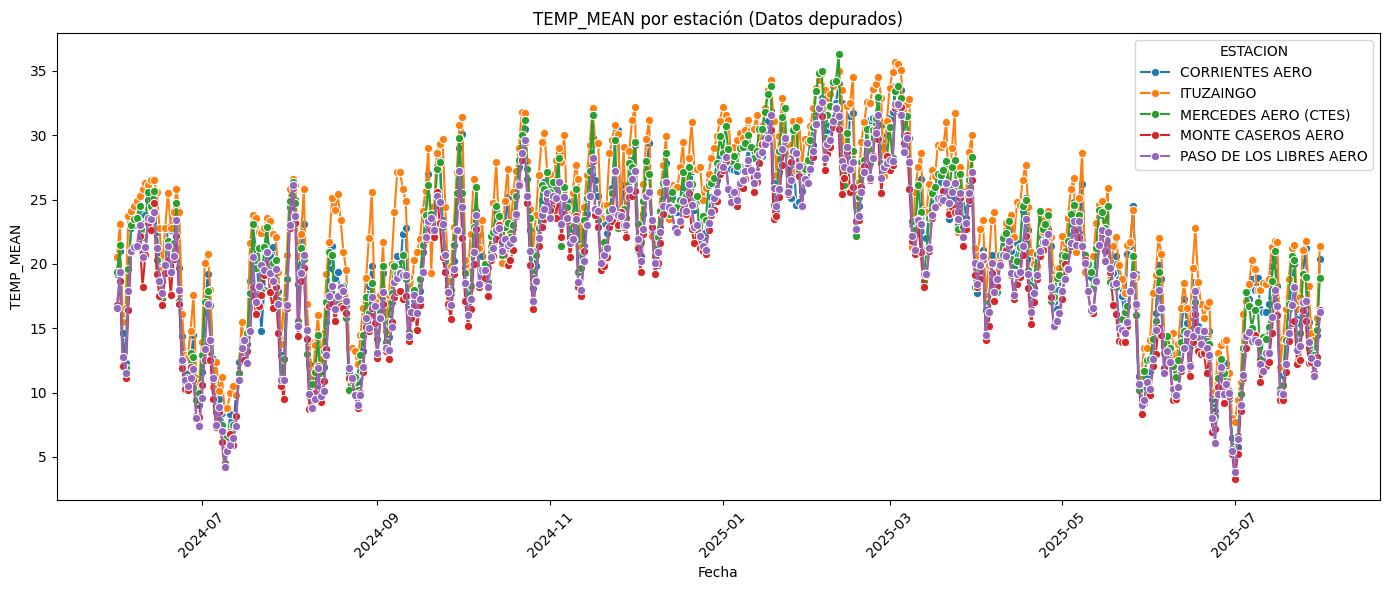

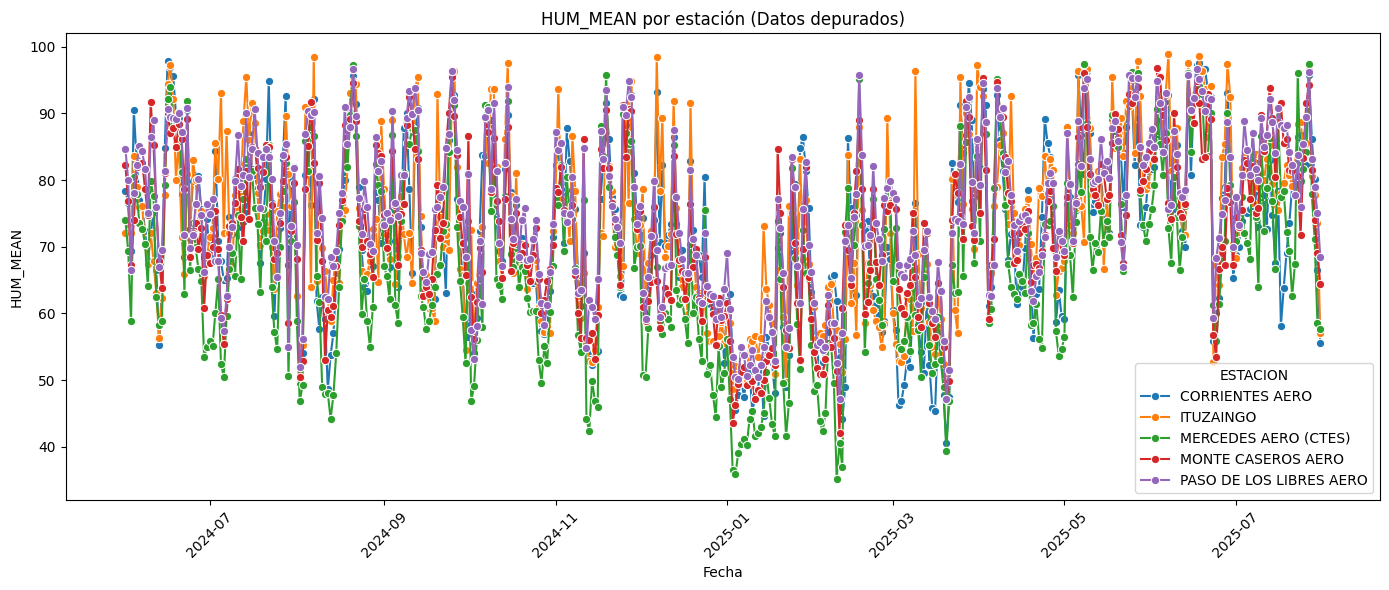

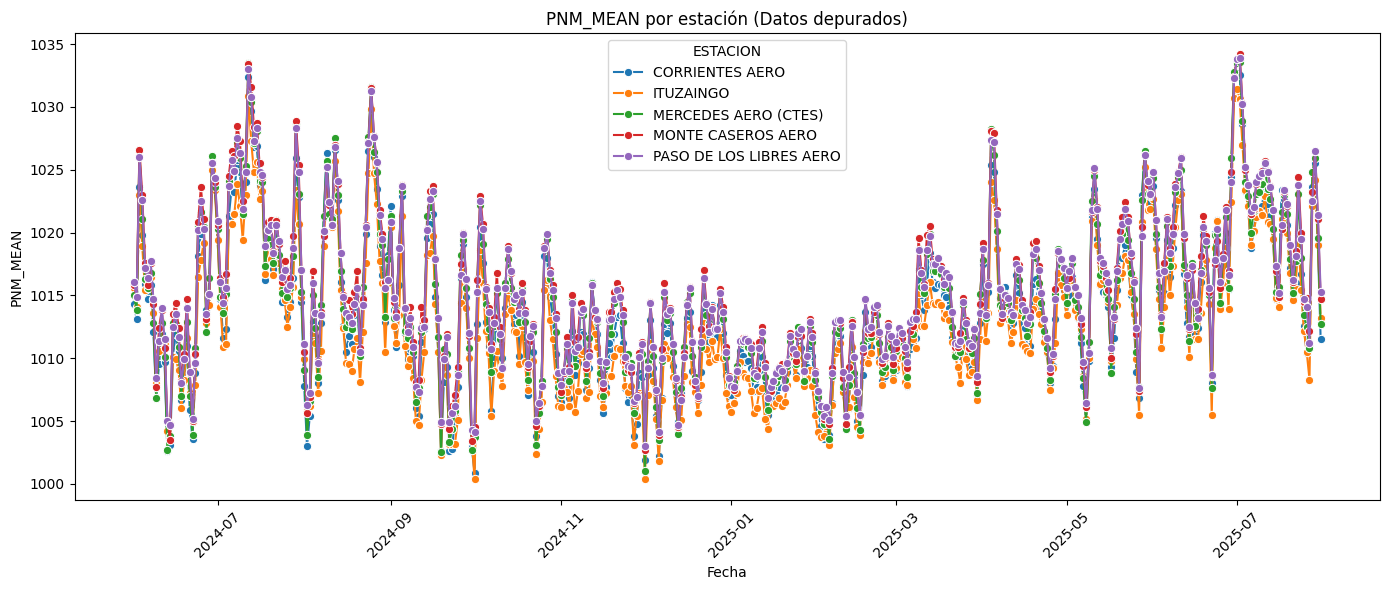

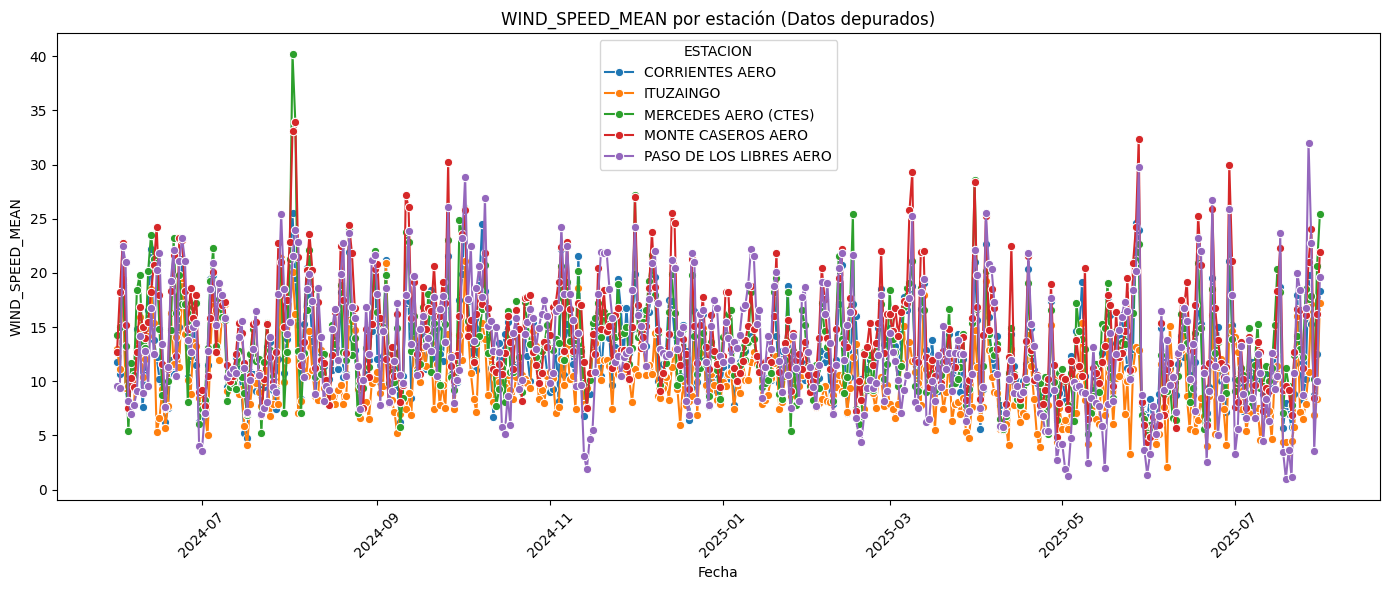

In [9]:
# Seleccionamos columnas clave
variables_clave = [
    'TEMP_MEAN', 'HUM_MEAN', 'PNM_MEAN', 'WIND_SPEED_MEAN'
]

# Gráfico de series temporales por estación
for var in variables_clave:
    plt.figure(figsize=(14,6))
    sns.lineplot(data=df_diario, x='FECHA', y=var, hue='ESTACION', marker='o')
    plt.title(f'{var} por estación (Datos depurados)')
    plt.xlabel("Fecha")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Distribución (Histograma) de cada variable clave

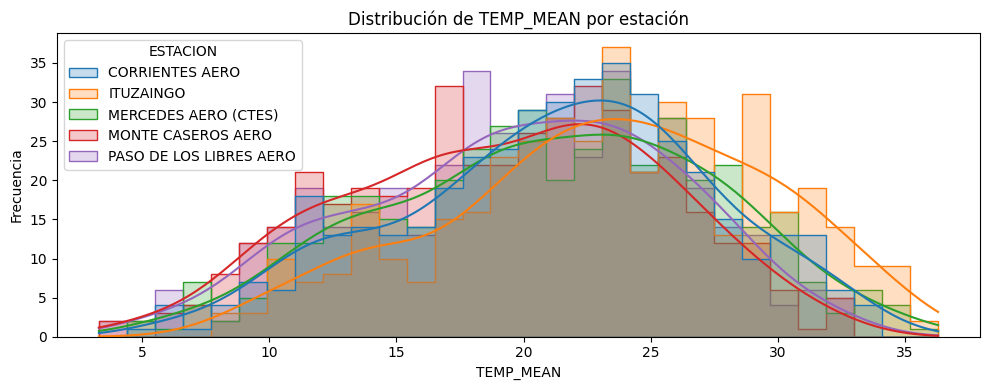

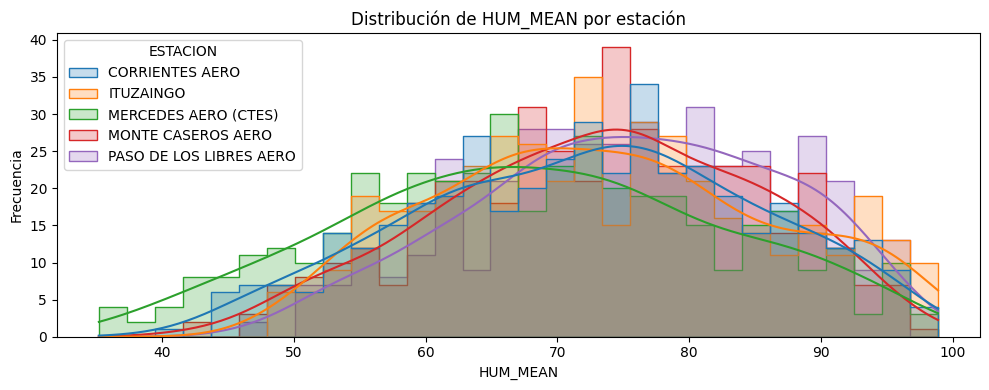

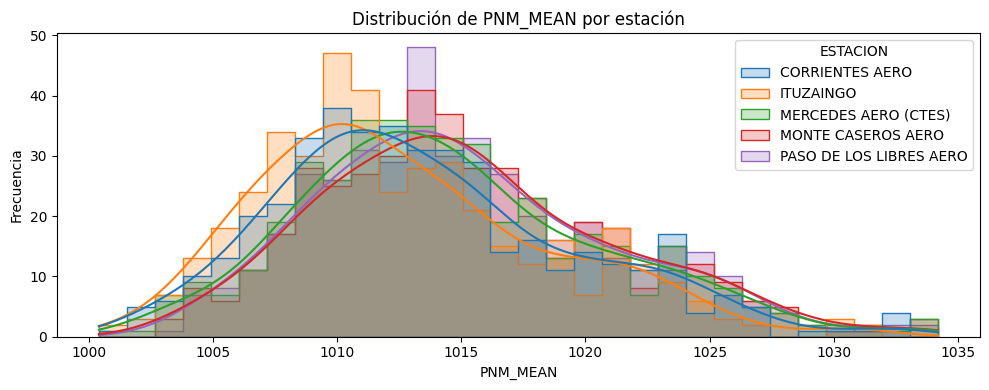

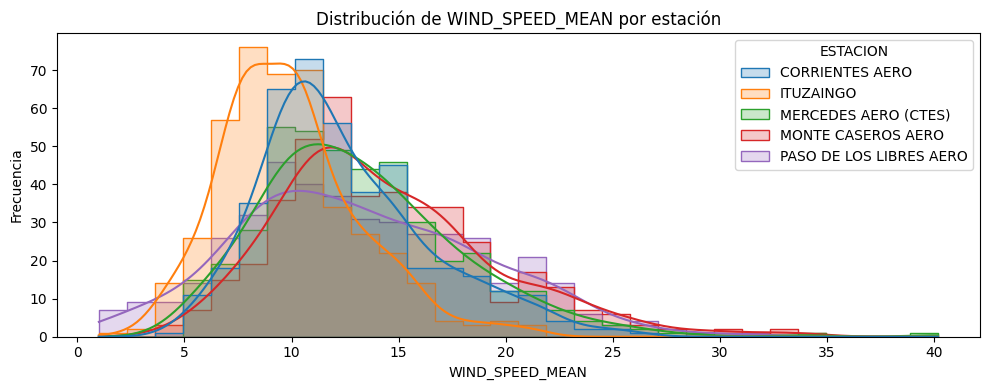

In [10]:
for var in variables_clave:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df_diario, x=var, hue='ESTACION', bins=30, kde=True, element="step")
    plt.title(f'Distribución de {var} por estación')
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

## Boxplots para comparar rangos entre estaciones

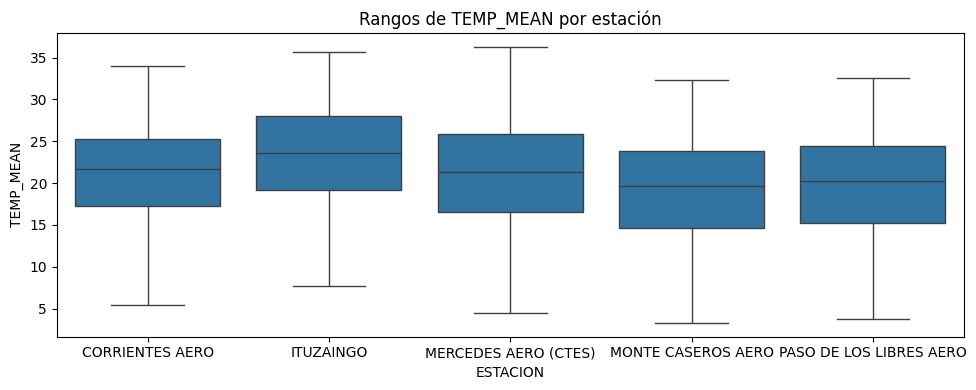

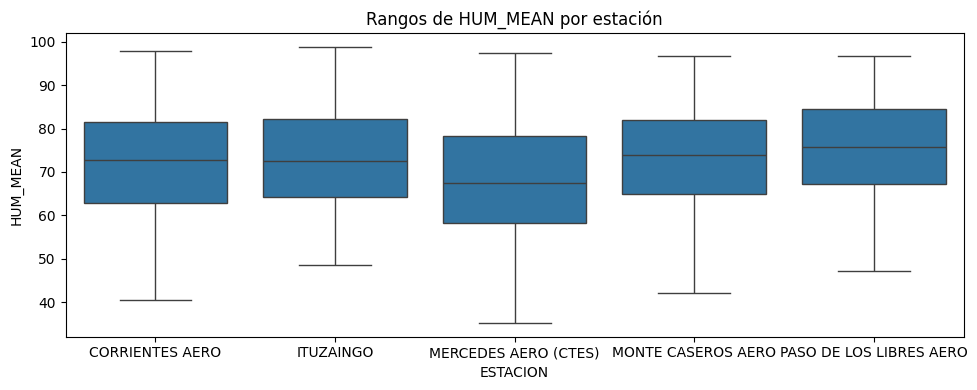

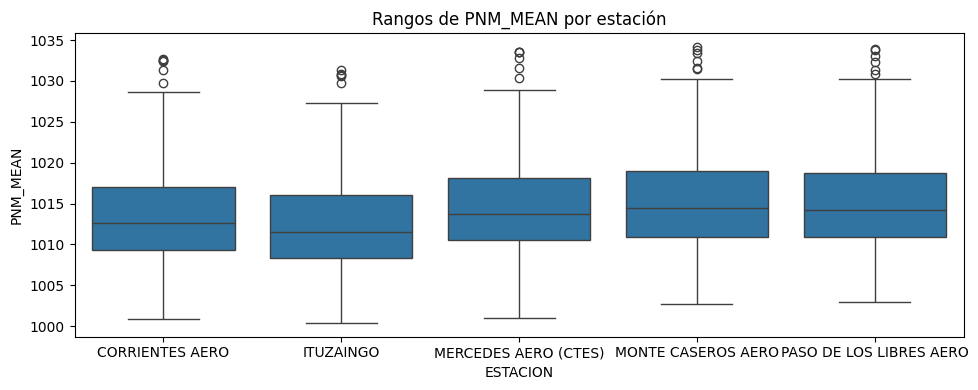

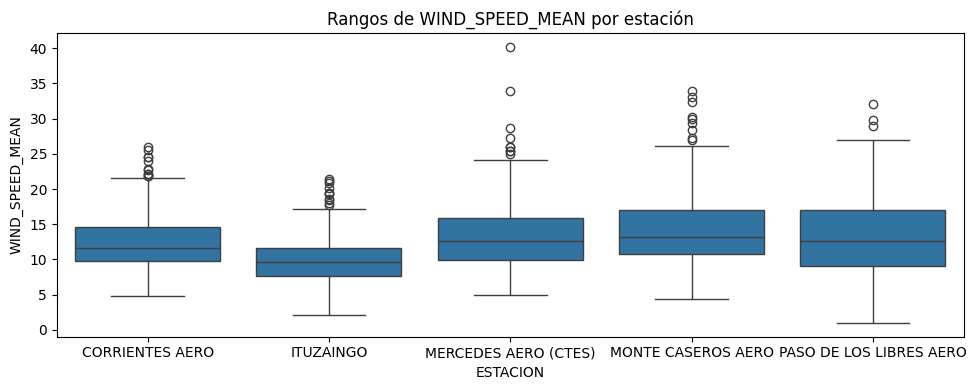

In [11]:
for var in variables_clave:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df_diario, x='ESTACION', y=var)
    plt.title(f'Rangos de {var} por estación')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

## Heatmap de correlación entre variables principales

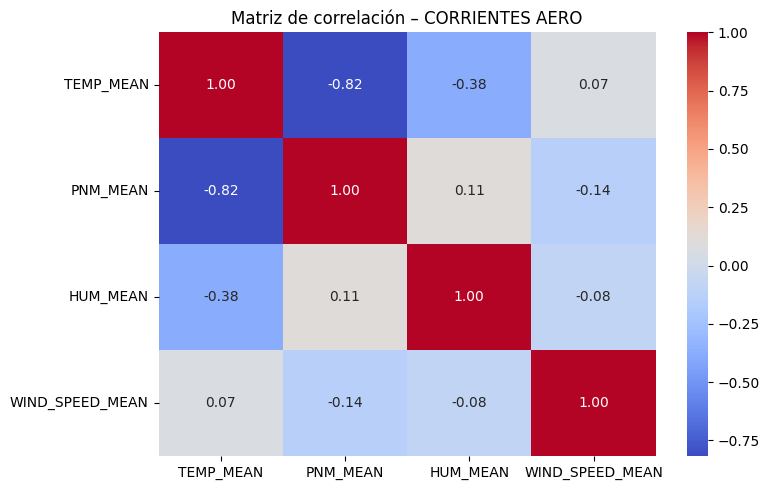

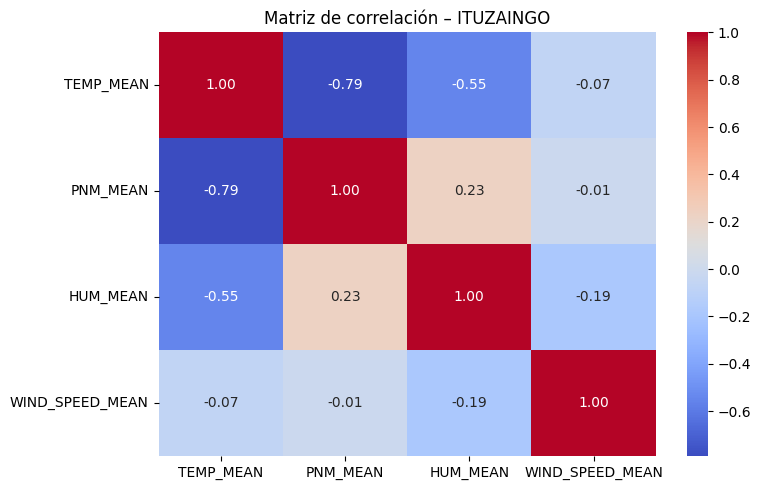

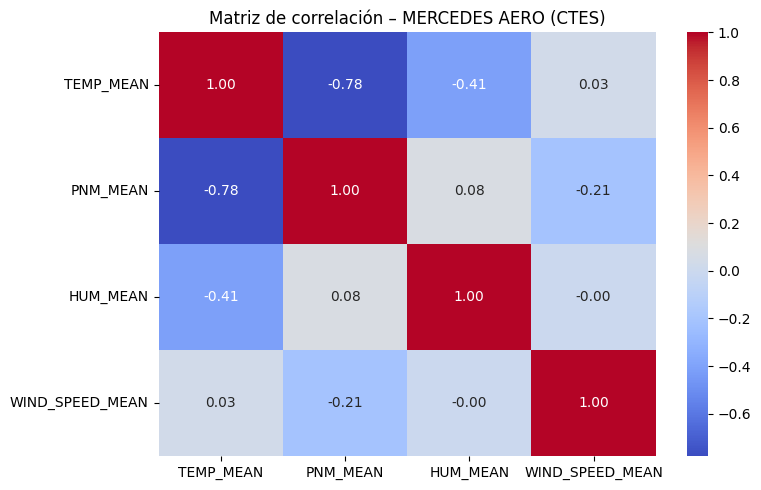

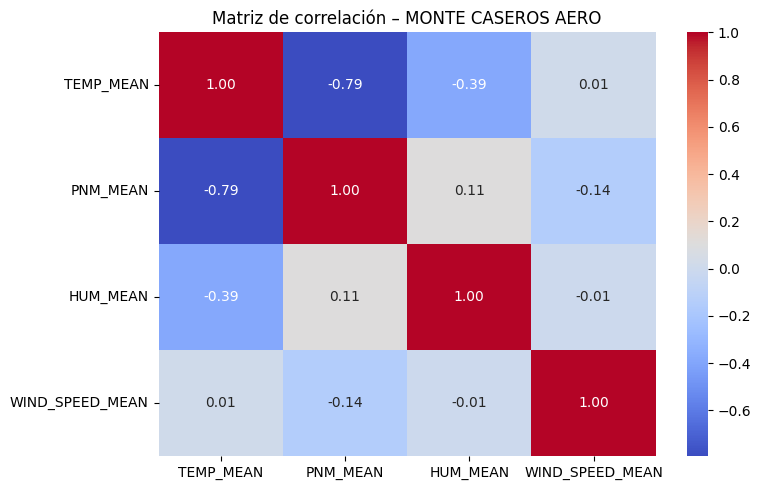

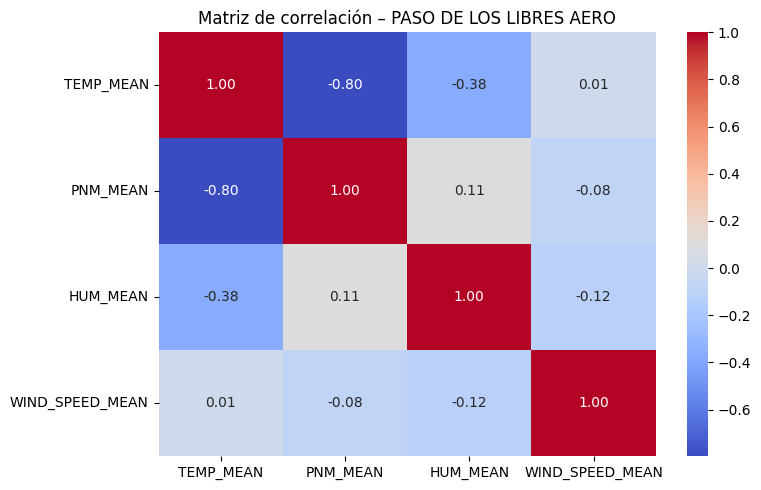

In [12]:
# Variables a incluir en la matriz de correlación
variables_corr = ['TEMP_MEAN','PNM_MEAN','HUM_MEAN','WIND_SPEED_MEAN']

# Iterar por cada estación
for estacion in df_diario['ESTACION'].unique():
    df_est = df_diario[df_diario['ESTACION'] == estacion]
    
    # Calcular correlación
    corr_matrix = df_est[variables_corr].corr()
    
    # Crear gráfico
    plt.figure(figsize=(8,5))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        cbar=True
    )
    plt.title(f'Matriz de correlación – {estacion}')
    plt.tight_layout()
    plt.show()


# Comparación antes y después de la imputación


Gráficos para estación: CORRIENTES AERO


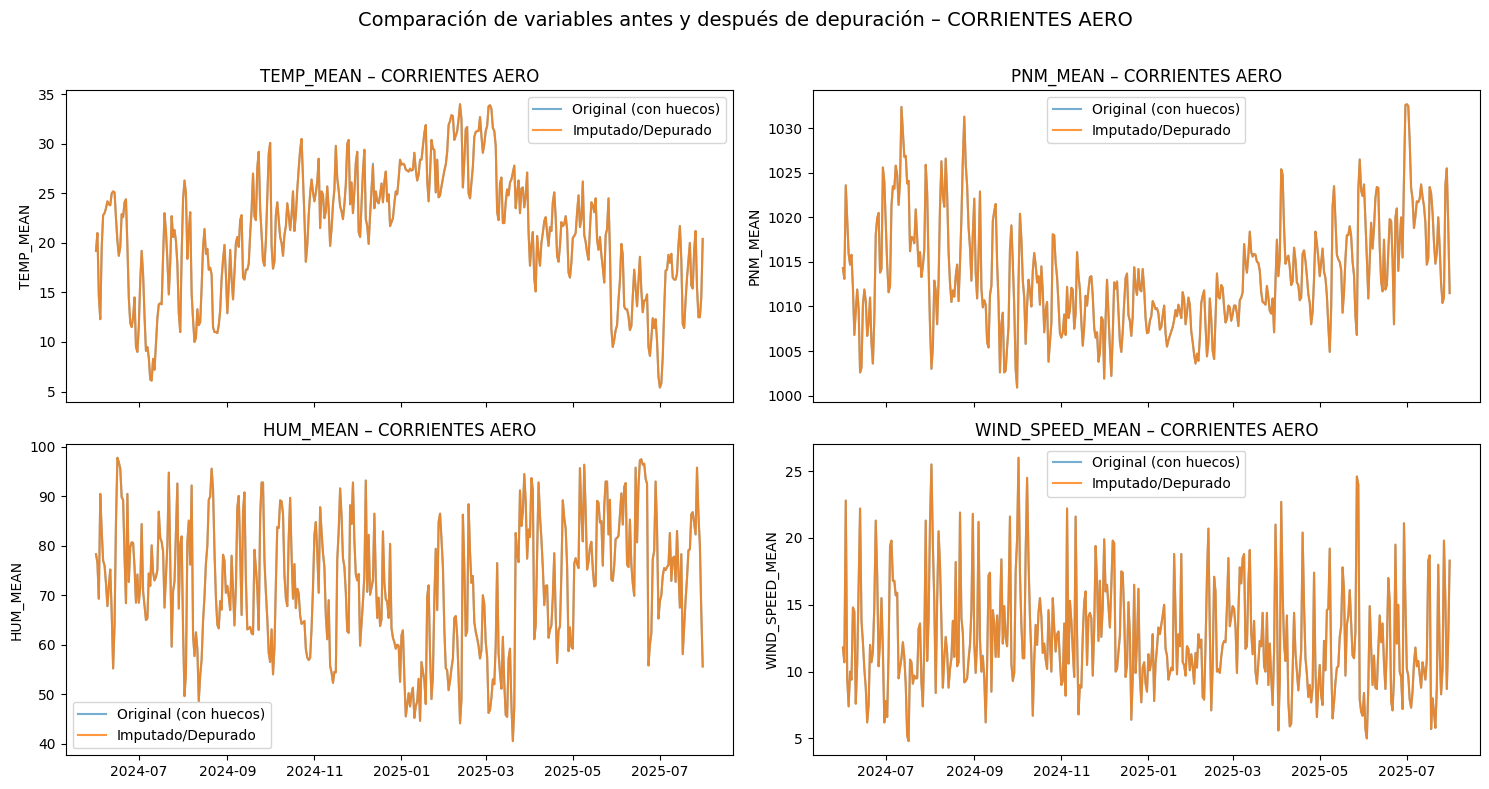


Gráficos para estación: ITUZAINGO


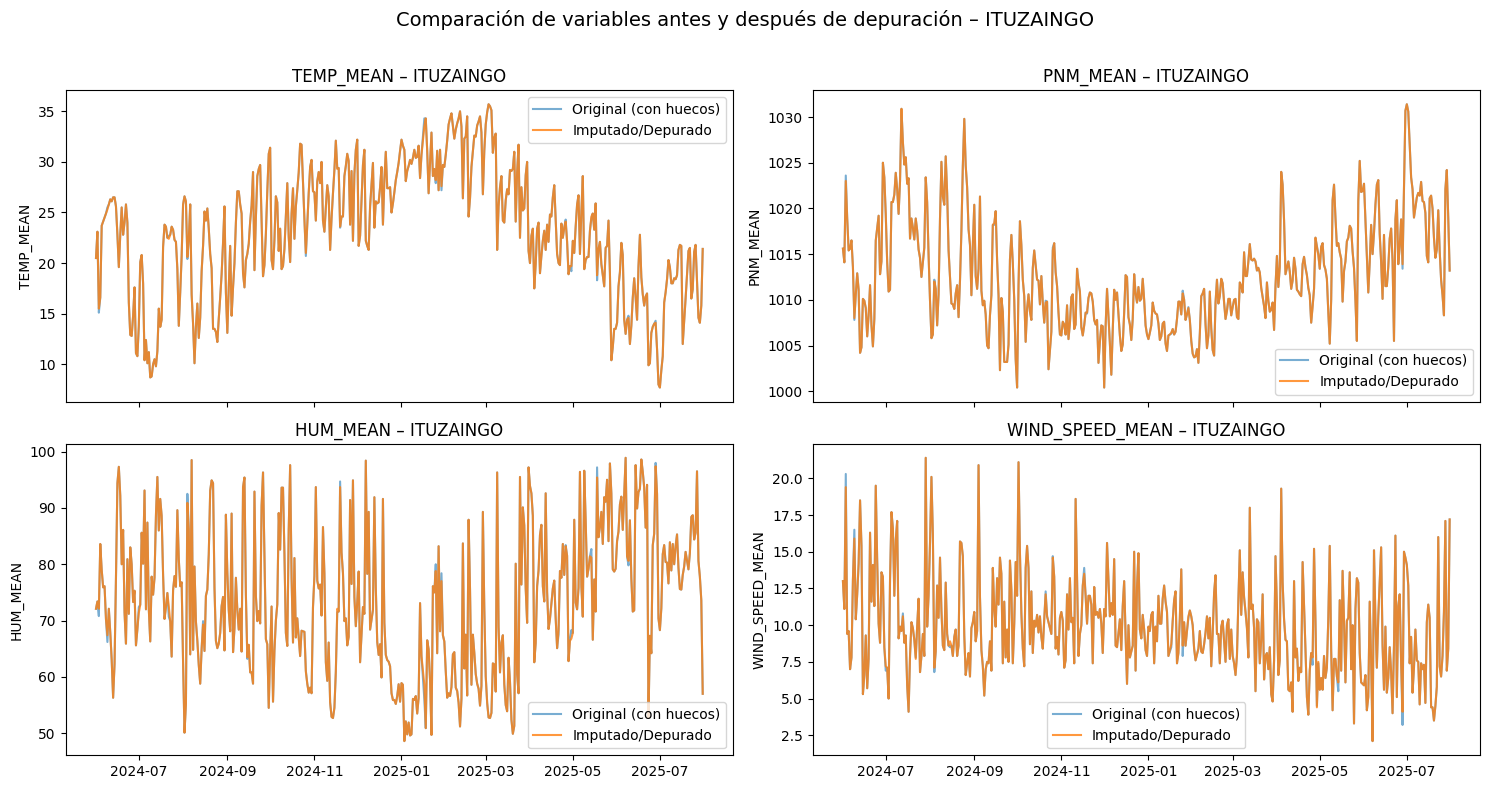


Gráficos para estación: MERCEDES AERO (CTES)


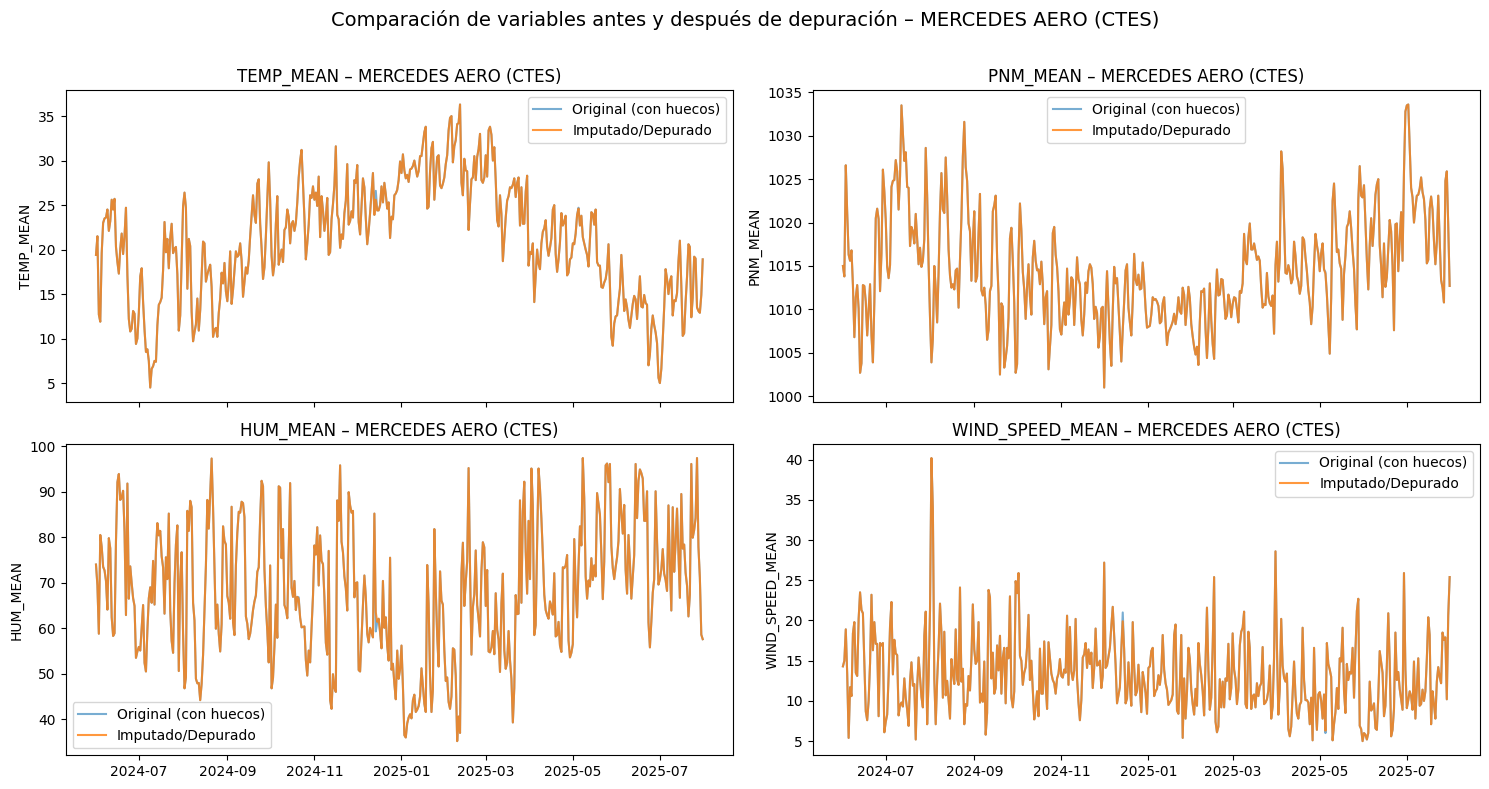


Gráficos para estación: MONTE CASEROS AERO


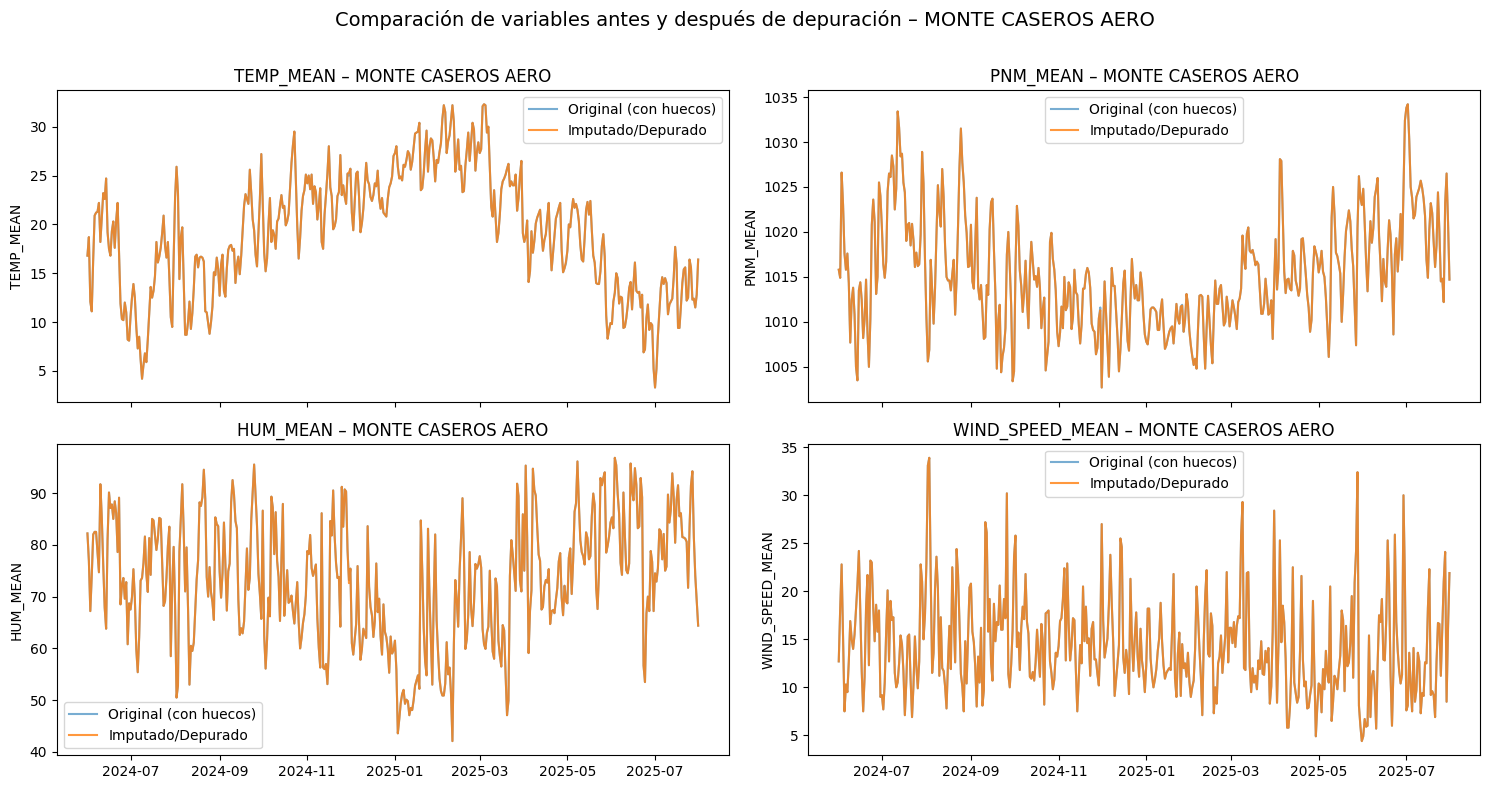


Gráficos para estación: PASO DE LOS LIBRES AERO


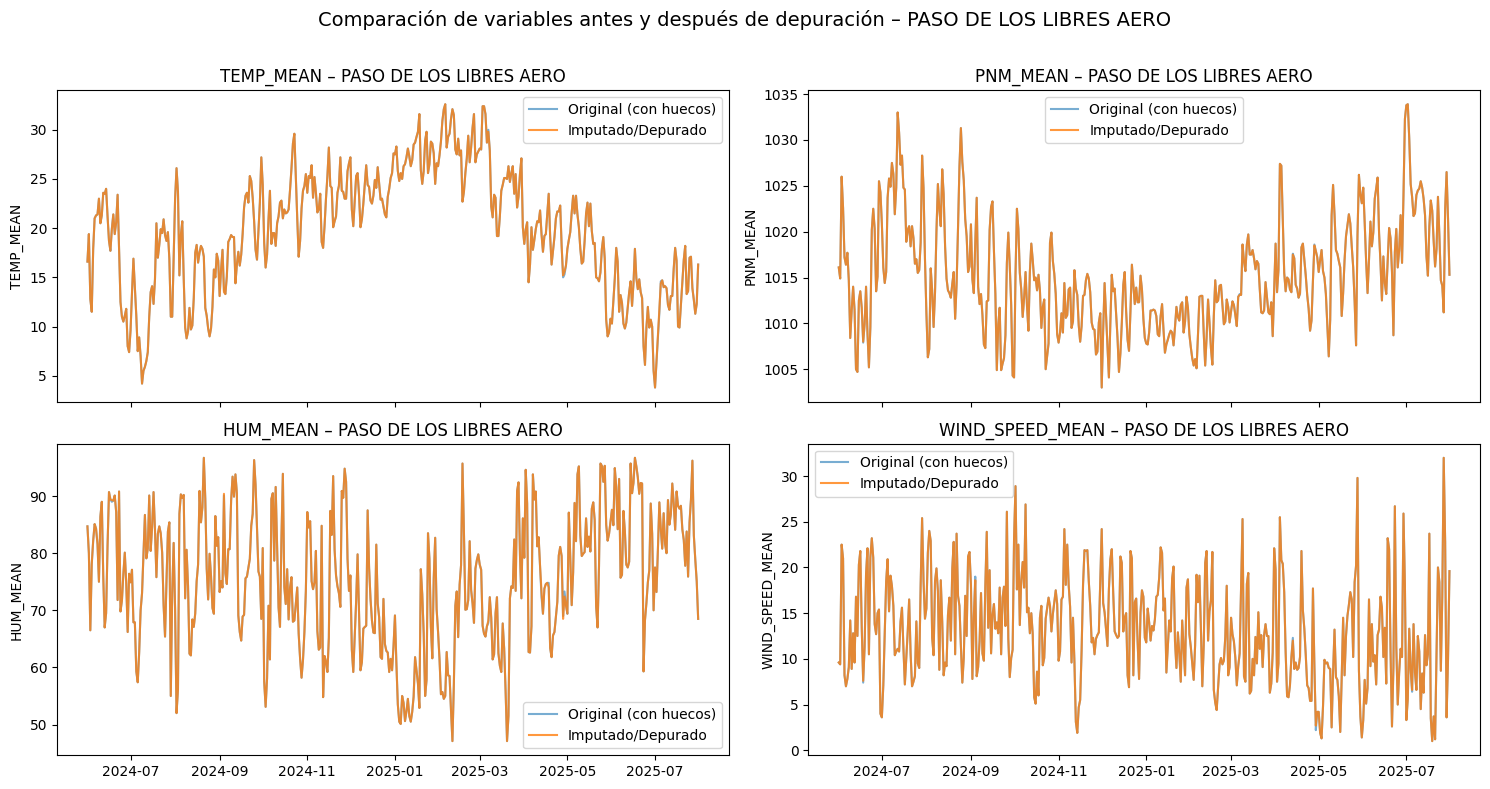

In [13]:
# Variables de interés
variables_corr = ['TEMP_MEAN','PNM_MEAN','HUM_MEAN','WIND_SPEED_MEAN']

# Dataset original y depurado
df_original = pd.read_csv(PLATA_DIR / "dataset_plata_inicial.csv", parse_dates=['FECHA'])
df_dep = df_diario.copy()

# Iterar por cada estación
for estacion in df_original['ESTACION'].unique():
    df_orig_est = df_original[df_original['ESTACION'] == estacion]
    df_dep_est = df_dep[df_dep['ESTACION'] == estacion]
    
    print(f"\nGráficos para estación: {estacion}")
    
    # Crear subplots: 2 filas x 2 columnas (para las 4 variables)
    fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    
    for i, var in enumerate(variables_corr):
        # Agrupar por fecha
        df_original_group = df_orig_est.groupby('FECHA')[var].mean()
        df_dep_group = df_dep_est.groupby('FECHA')[var].mean()

        # Graficar
        axes[i].plot(df_original_group.index, df_original_group.values, label='Original (con huecos)', alpha=0.6)
        axes[i].plot(df_dep_group.index, df_dep_group.values, label='Imputado/Depurado', alpha=0.8)
        axes[i].set_title(f'{var} – {estacion}', fontsize=12)
        axes[i].set_ylabel(var)
        axes[i].legend()

    plt.suptitle(f'Comparación de variables antes y después de depuración – {estacion}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Conclusión

En esta etapa se trabajó sobre la **Capa Oro**, última fase del pipeline de datos, donde la información ya había sido limpiada y estructurada en la Capa Plata.  
El objetivo principal fue **preparar los datos para análisis avanzados y la generación de valor** mediante un conjunto de pasos clave:

1. **Selección de variables relevantes** para el modelado y análisis.  
2. **Normalización y codificación final** para garantizar compatibilidad con algoritmos.  
3. **División de datos en conjuntos de entrenamiento y prueba** para futuras tareas de clasificación o predicción.  
4. **Validación de consistencia y control de calidad**, evitando valores atípicos o inconsistencias que puedan afectar los modelos.  

Con la creación de esta capa, se completa el proceso de **depuración y validación de datos**, dejando la información **lista para aplicaciones analíticas, minería de datos y desarrollo de modelos predictivos**.  

La **Capa Oro** se convierte así en la **fuente confiable y optimizada** del proyecto, donde cada registro ha pasado por un flujo de **ingesta, limpieza, transformación y validación final**, asegurando **trazabilidad y calidad de la información** para su explotación.